In [49]:
import pandas as pd
import lime

import sklearn
import sklearn.ensemble
import sklearn.metrics

In [50]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.2f}'.format)

In [51]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]
y = df['Type']

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [52]:
from sklearn.naive_bayes import CategoricalNB

gnb = CategoricalNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [53]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)

print(classification_report(y_true = y_test, y_pred = y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.62      0.77         8
 Familial hemiplegic migraine       0.60      0.60      0.60         5
        Migraine without aura       0.91      0.91      0.91        11
                        Other       1.00      1.00      1.00         4
 Sporadic hemiplegic migraine       1.00      0.20      0.33         5
   Typical aura with migraine       0.88      0.98      0.93        62
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.89       100
                    macro avg       0.91      0.76      0.79       100
                 weighted avg       0.90      0.89      0.88       100



In [54]:

class_labels = gnb.classes_
class_probabilities = dict(zip(class_labels, gnb.predict_proba(X_test)[0]))
print(class_probabilities)

{'Basilar-type aura': 0.8878884636940544, 'Familial hemiplegic migraine': 0.086028386551334, 'Migraine without aura': 5.710083762708755e-05, 'Other': 0.008497252119480917, 'Sporadic hemiplegic migraine': 0.001305319051303602, 'Typical aura with migraine': 0.015614364950680094, 'Typical aura without migraine': 0.0006091127955203756}


In [55]:


#from lime.lime_text import LimeTextExplainer
#explainer = LimeTextExplainer(class_names=class_labels)



In [56]:
from lime.lime_tabular import LimeTabularExplainer

# Stwórz explainer z danych treningowych (potrzebuje surowych, nieprzeskalowanych danych)
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # nieprzeskalowane dane treningowe, jeśli dostępne
    feature_names=df.columns[:-1].tolist(),  # nazwy cech
    class_names=class_labels,  # nazwy klas
    mode='classification'  # dla zadania klasyfikacji
)

In [57]:
print(class_probabilities.keys())

dict_keys(['Basilar-type aura', 'Familial hemiplegic migraine', 'Migraine without aura', 'Other', 'Sporadic hemiplegic migraine', 'Typical aura with migraine', 'Typical aura without migraine'])


In [58]:
print(class_labels)

['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Other' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']


[('Paresthesia > 0.00', 0.007162495224491981), ('Character <= 1.00', -0.004525348310222744), ('Location <= 1.00', -0.003507601130960809), ('Duration > 2.00', 0.001736394683967336), ('2.00 < Intensity <= 3.00', 0.0012631532965292085), ('Diplopia <= 0.00', 0.0008758568095831947), ('Age <= 22.00', 0.000762710199545484), ('Visual > 2.00', -0.0006268409601106516), ('Hypoacusis <= 0.00', -0.0004450909773609252), ('Visual_defect <= 0.00', 0.0003589518000487743), ('Sensory > 0.00', -0.0003284823825714218), ('Frequency <= 1.00', -0.0002565015426717167), ('Dysphasia <= 0.00', -0.0002034705013058919), ('Dysarthria <= 0.00', 0.00018458229551436843), ('Conscience <= 0.00', 0.00011119154860154821), ('Vertigo > 0.00', 8.96689266066543e-05), ('Tinnitus <= 0.00', -1.1252537065349814e-05), ('0.00 < DPF <= 1.00', -3.34388456151659e-06), ('Vomit <= 0.00', -1.7020580764900386e-06), ('Ataxia <= 0.00', 0.0), ('Nausea <= 1.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0)]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

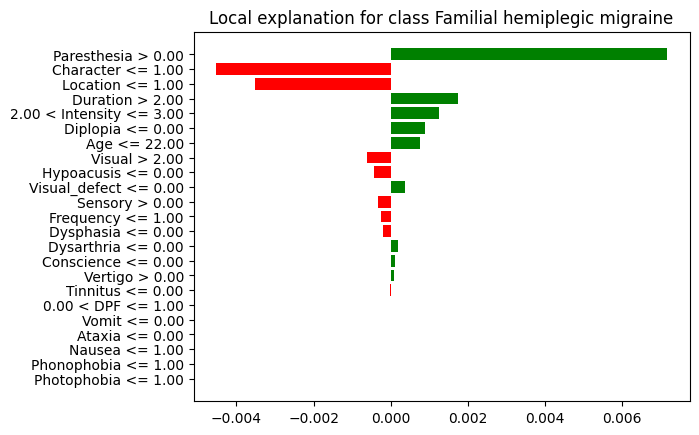

In [59]:
instance_index = 0  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba, # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [60]:
exp.show_in_notebook()

[('Character <= 1.00', -0.003815402661379939), ('Location <= 1.00', -0.0028648867637071957), ('2.00 < Frequency <= 4.00', 0.0012676369045662632), ('Intensity <= 2.00', -0.0011425348469584122), ('1.00 < Visual <= 2.00', 0.0007332684613870036), ('Duration <= 1.00', -0.0006033550255591126), ('Age > 40.00', -0.0005061364030387291), ('Conscience <= 0.00', 0.00040211344527253586), ('Sensory <= 0.00', 0.00029070920978005937), ('Dysarthria <= 0.00', -0.0002636457232101598)]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

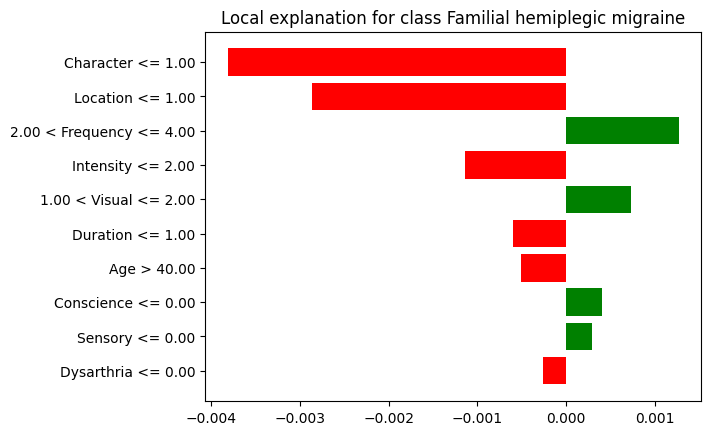

In [61]:
instance_index = 1  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [62]:
exp.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('Character <= 1.00', -0.0037725997692744356), ('Location <= 1.00', -0.0033853124774336674), ('2.00 < Intensity <= 3.00', 0.0011151751568253623), ('Duration <= 1.00', -0.0007540699419455548), ('29.00 < Age <= 40.00', -0.0005311452100903042), ('Visual <= 1.00', -0.0004447260079936503), ('Paresthesia <= 0.00', -0.0003320078838828227), ('Hypoacusis <= 0.00', 0.00030593573004635585), ('Visual_defect <= 0.00', 0.00028673511283110566), ('Sensory > 0.00', -0.00025016503111612064), ('Dysarthria <= 0.00', 0.00017356753047228102), ('Dysphasia <= 0.00', -0.00017320103464025957), ('Conscience <= 0.00', 0.00016456561485011996), ('Tinnitus <= 0.00', -8.543343030664331e-05), ('Vertigo <= 0.00', 7.27252972644449e-05), ('DPF <= 0.00', 2.5866828453895996e-05), ('Vomit <= 0.00', 1.7960376821494998e-05), ('Diplopia <= 0.00', 1.1947249590685423e-05), ('1.00 < Frequency <= 2.00', 6.698366184519434e-06), ('Nausea <= 1.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0), ('Ataxia <= 0.00', 

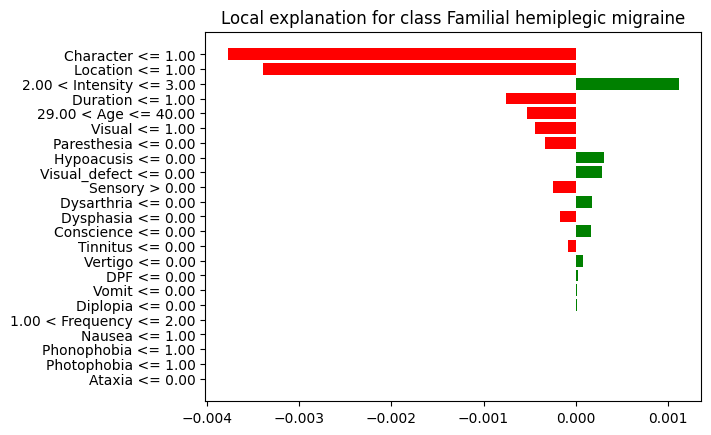

In [63]:
instance_index = 49  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba,  # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure(label=1)

In [64]:
exp.show_in_notebook(show_predicted_value=True)

[('Character <= 1.00', -0.0056556504247529905), ('Location <= 1.00', -0.0039578455196997465), ('Intensity <= 2.00', -0.0012293462794513003), ('Visual > 2.00', -0.0007810719128401853), ('Duration <= 1.00', -0.0007692334621963676), ('Hypoacusis <= 0.00', -0.0006665733172498876), ('Age > 40.00', -0.0005666020389004854), ('Visual_defect <= 0.00', -0.0004663015367983025), ('Sensory > 0.00', -0.00036608230949310887), ('Diplopia <= 0.00', 0.0002328762370387587)]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

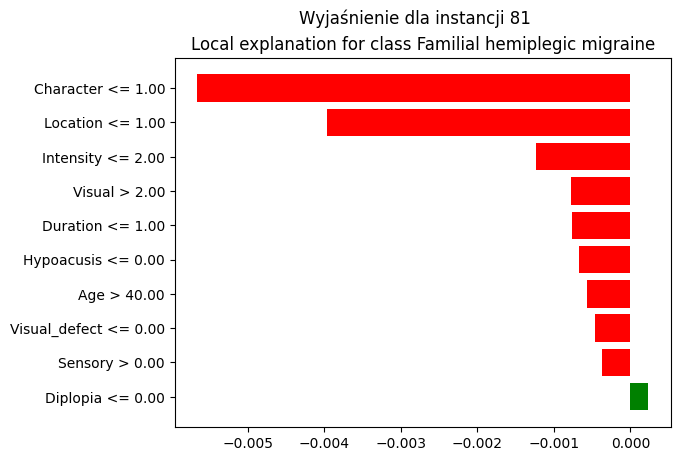

In [65]:
instance_index = 80  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = fig = exp.as_pyplot_figure()
fig.suptitle(f'Wyjaśnienie dla instancji {instance_index+1}')
plt.show()

In [66]:
exp.show_in_notebook()

[('Character > 1.00', 0.0051511856137231565), ('Location > 1.00', 0.00376017055682473), ('Duration > 2.00', 0.0015472314869052293), ('2.00 < Intensity <= 3.00', 0.001213455747866597), ('Visual <= 1.00', -0.0006061044317430082), ('Age > 40.00', -0.0005747008659198195), ('Frequency <= 1.00', -0.0003285801143067778), ('Sensory <= 0.00', 0.0003215966724732492), ('Paresthesia <= 0.00', 0.0002817586339085049), ('Dysarthria <= 0.00', -0.0002668506208437654)]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

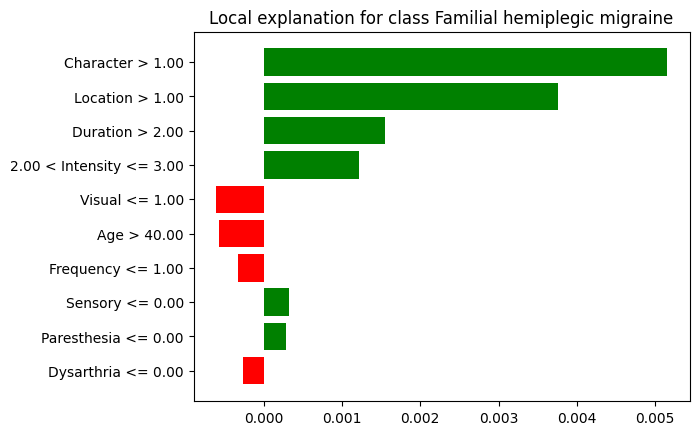

In [67]:
instance_index = 22  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [82]:
exp.show_in_notebook()

In [69]:
#print("Przewidywane klasy dla instancji:", gnb.predict(X_test[instance_index].reshape(1, -1)))


In [70]:
print(exp.top_labels)

None


In [71]:
probs = gnb.predict_proba(X_test)
class_labels = gnb.classes_
class_probabilities = []
for i in range(len(probs)):
    class_probabilities.append(dict(zip(class_labels, probs[i])))


In [72]:


for i in range(len(class_probabilities)):
    print(i, ":", y_pred[i])
    for klucz, wartosc in class_probabilities[i].items():
        print(f"{wartosc}: \t{klucz}")
    print(" ")

0 : Basilar-type aura
0.8878884636940544: 	Basilar-type aura
0.086028386551334: 	Familial hemiplegic migraine
5.710083762708755e-05: 	Migraine without aura
0.008497252119480917: 	Other
0.001305319051303602: 	Sporadic hemiplegic migraine
0.015614364950680094: 	Typical aura with migraine
0.0006091127955203756: 	Typical aura without migraine
 
1 : Typical aura with migraine
1.0844095236328973e-05: 	Basilar-type aura
0.000256084776523683: 	Familial hemiplegic migraine
3.7382299169130226e-05: 	Migraine without aura
9.709132259503369e-06: 	Other
0.00033471224636999475: 	Sporadic hemiplegic migraine
0.9993511622721301: 	Typical aura with migraine
1.0517831160873041e-07: 	Typical aura without migraine
 
2 : Typical aura with migraine
0.144870509653324: 	Basilar-type aura
0.3368795081082902: 	Familial hemiplegic migraine
0.024456446885692984: 	Migraine without aura
0.008734551874349891: 	Other
0.0003194695797191486: 	Sporadic hemiplegic migraine
0.4840239444435996: 	Typical aura with migraine
0